In [10]:
import warnings
warnings.filterwarnings('ignore');
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Logstic(Sigmoid) function to Logit function

$$ 
\large p = \frac{1}{1+\exp(-x)} \quad \Rightarrow \quad \exp(-x) = \frac{1}{p}-1
$$

$$ 
\large
\Rightarrow \quad x = -\log(\frac{1}{p}-1) \quad = \quad -\log(\frac{1-p}{p}) \quad = \quad \log(\frac{p}{1-p}) \quad = \quad \log(p) - \log(1-p)
$$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logit(p):
    return np.log(p /(1 - p))

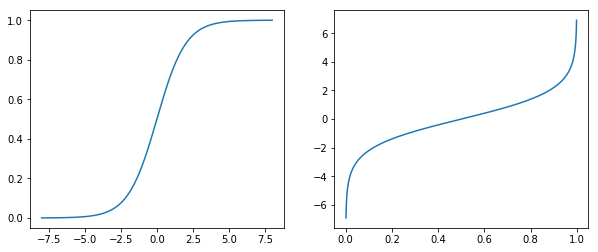

In [3]:
x, p = np.linspace(-8,8,1000), np.linspace(0,1,1000)
_, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
axL.plot(x, sigmoid(x))
axR.plot(p[1:-1], logit(p[1:-1])) # slicing to avoid zerp devisions

## Differentiation Formulas

### Inverse Function

$$
\Large y \large \; = \; f(x) \qquad \qquad \quad \\
\Large x \large \; = \; g(y) \; = \; g(f(x)) \; = \; g \cdot f
$$

$$
\large 1(\small=x'\large) \quad = \; \frac{d}{dx} g \cdot f \; = \; \frac{d}{dx} g \cdot \frac{dy}{dx}
 \; = \; \frac{dx}{dy} \frac{dy}{dx}
$$

$$
\large \frac{dy}{dx} \; = \; \frac{1}{\Large \frac{dx}{dy}\large}
$$

$\;$

## Differentiations with Napier's constant

$$
\Large e \large \; = \; \lim_{n \to \infty}(1+\frac{1}{n})^n \quad or \quad \lim_{n \to 0}(1+n)^\frac{1}{n}
$$

In [9]:
# e = ((1+(1/n))**n for n in range(1, 10<<100))
def napier(n):
    while True:
        yield (1+(1/n))**n
        n += 3
e = napier(1)
print(next(e), next(e), next(e), next(e))
print(napier(100).__next__(), napier(1000).__next__(), napier(10000).__next__())

2.0 2.44140625 2.546499697040712 2.5937424601000023
2.7048138294215285 2.7169239322355936 2.7181459268249255


### Logarithm Differentiation $\Bigl(\log x\Bigr)' \; = \; \large \frac{1}{x}$

$$
\large
\lim_{h \to 0} \frac{\log(x+h) - \log(x)}{h} \quad \longrightarrow \quad \lim_{h \to 0} \frac{1}{h} \log(\frac{x+h}{x})
\quad \longrightarrow \quad \lim_{h \to 0} \frac{1}{h} \log(1 + \frac{h}{x})
$$

$$
\large
\; \longrightarrow \quad \lim_{h \to 0} \frac{1}{xk} \log(1 + k) \; \small \verb|※| \; \frac{h}{x}=k \quad
\large
\longrightarrow \quad \lim_{h \to 0} \frac{1}{x} \log(1 + k)^\frac{1}{k}
\longrightarrow \quad \frac{1}{x} \log e
$$

$\;$

### Logarithm with Non-Base e Differentiation $\Bigl(\log_a x\Bigr)' \; = \; \large \frac{1}{x \log a}$

$$
\large \log_a x' \quad = \quad \frac{d}{dx}\frac{\log_e x}{\log_e a} \;=\; \frac{1}{x\log_e a}
$$

$\;$

### Exponential function Differentiation $ \;\exp(x)' \; = \; \exp(x) $  by Inverse Function

### Exponential function Differentiation $ \;\exp(x)' \; = \; \exp(x) $

$$
\large \lim_{h \to 0}\frac{\exp(x+h)-\exp(x)}{h} \quad \longrightarrow \quad \lim_{h \to 0}\frac{\exp(x)(\exp(h)-1)}{h}
\quad
\left\{※
    \begin{array}{111}
        \exp(h)-1 = k\\
        h= \log(k+1)\\
        \lim_{h\to0} \rightarrow \lim_{k\to0}
    \end{array}
\right.
$$

$$
\large \quad\lim_{h\to0}\exp(x)\frac{k}{\log(k+1)}\frac{k^{-1}}{k^{-1}}
\quad \longrightarrow \quad \lim_{k\to0}\exp(x)\frac{1}{\log(k+1)^{\frac{1}{k}}}
\quad \longrightarrow \quad \exp(x)\frac{1}{\log e}
$$

$\;$

## Softmax with Loss Partial Derivative

$$
\large
Softmax \quad y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} \quad \quad ※\frac{\exp(a_k)}{S}
$$

$$
\large
Cross \, Entropy \, Error \quad L = -\sum_k t_k\log(y_k)
$$

#### Loss Partial Derivative 

$$
\large
-\frac{t_k}{y_k} \quad  = \quad -t_k \times \frac{1}{y_k}\Bigl(\small= \frac{\partial\log y_k}{\partial y_k} \large \Bigr) \; \longleftarrow \; -1 \times t_k \; \longleftarrow \; -1 + 0 \Bigl(\small= (\sum_k)' \large \Bigr)  \; \longleftarrow \; 1 \times -1 \; \longleftarrow \; 1 \Bigl(\small= \frac{\partial L}{\partial L} \large \Bigr)
$$

#### Softmax Partial Derivative Branched $\frac{1}{S}$

$$
\large
\frac{1}{S} \Bigl(\small\verb|※one_hot_label| \large \Bigr) \quad \longleftarrow \quad -t_k S \times -\frac{1}{S^2} \quad \longleftarrow \quad -\frac{t_k S}{\exp(a_k)} \Bigl(\small=-\frac{t_k}{y_k} \large \Bigr) \times \; \exp(a_k)
$$

#### Softmax Partial Derivative Branched $\exp(a_k)$

$$
\large
-\frac{t_k}{\exp(a_k)} \quad \longleftarrow \quad -\frac{t_k S}{\exp(a_k)} \Bigl(\small=-\frac{t_k}{y_k} \large \Bigr) \times \; \frac{1}{S}
$$

#### Softmax Partial Derivative Merged

$$
\large
y_k - t_k \; \longleftarrow \; (\frac{1}{S} - \frac{t_k}{\exp(a_k)}) \times \exp(a_k) \; \longleftarrow \; \frac{1}{S} + -\frac{t_k}{\exp(a_k)}
$$